Karan Aryal

MSCS-634-B01

Lab3: Classification Using KNN and RNN Algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_wine

# Loading the dataset
wine = load_wine()
X = wine.data
y = wine.target

In [3]:
# Converting to DataFrame to explore
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Feature overview
print("Feature Names:\n", wine.feature_names)
print("Shape of dataset:", df.shape)


Feature Names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Shape of dataset: (178, 14)


In [4]:
# Descriptive statistics
print("Descriptive Statistics:\n", df.describe())


Descriptive Statistics:
           alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.

In [5]:
# Class distribution
class_counts = Counter(y)
print("Class Distribution:", class_counts)


Class Distribution: Counter({np.int64(1): 71, np.int64(0): 59, np.int64(2): 48})


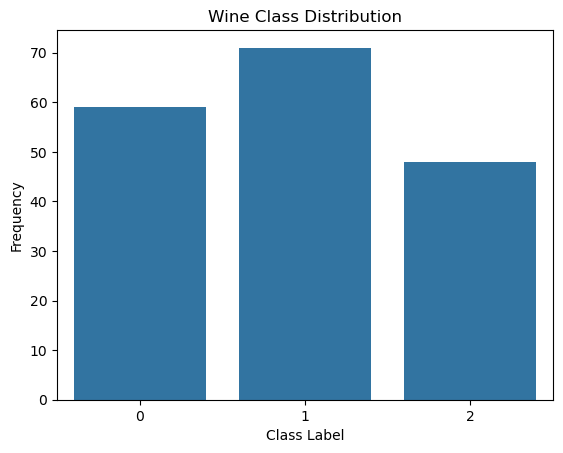

In [6]:
# Visualizing class distribution using countplot
sns.countplot(x='target', data=df)
plt.title("Wine Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

This dataset is not completely balanced but not wildly imbalanced either.

Training and Testing dataset and splitting into 80/20

In [7]:
from sklearn.model_selection import train_test_split

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 142
Testing set size: 36


Now, Implementing K-Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Using k values as
k_values = [1, 5, 11, 15, 21]
accuracy_results = {}

for k in k_values:

    # Initializing KNN with current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Training the classifier
    knn.fit(X_train, y_train)

    # Predicting on test set
    y_pred = knn.predict(X_test)

    # Calculating accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[k] = acc

    print(f"k = {k} with Accuracy = {acc:.4f}")


k = 1 with Accuracy = 0.7778
k = 5 with Accuracy = 0.8056
k = 11 with Accuracy = 0.8056
k = 15 with Accuracy = 0.8056
k = 21 with Accuracy = 0.8056


k = 1: Achieves low accuracy maybe because the Wine dataset is relatively clean and small.

k = 5 to 21: These are sweet spots; small enough to model local structure, but large enough to smooth over noise.

Now implementing RNN

In [17]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius_values = [350, 400, 450, 500, 550, 600]
rnn_large_radius_results = {}

# Iterate over specified radius values
for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label=-1)
    rnn.fit(X_train, y_train)

    # Predict and compute accuracy
    y_pred_rnn = rnn.predict(X_test)
    acc_rnn = accuracy_score(y_test, y_pred_rnn)
    rnn_large_radius_results[r] = acc

    print(f"Radius = {r} with Accuracy = {acc:.4f}")


Radius = 350 with Accuracy = 0.8056
Radius = 400 with Accuracy = 0.8056
Radius = 450 with Accuracy = 0.8056
Radius = 500 with Accuracy = 0.8056
Radius = 550 with Accuracy = 0.8056
Radius = 600 with Accuracy = 0.8056


As the radius increases, the model covers more neighbors which generally increases accuracy up to a saturation point.
Beyond that, you don’t gain much unless you include noise.

Visualizing and comparing result

Plot: Accuracy vs KNN

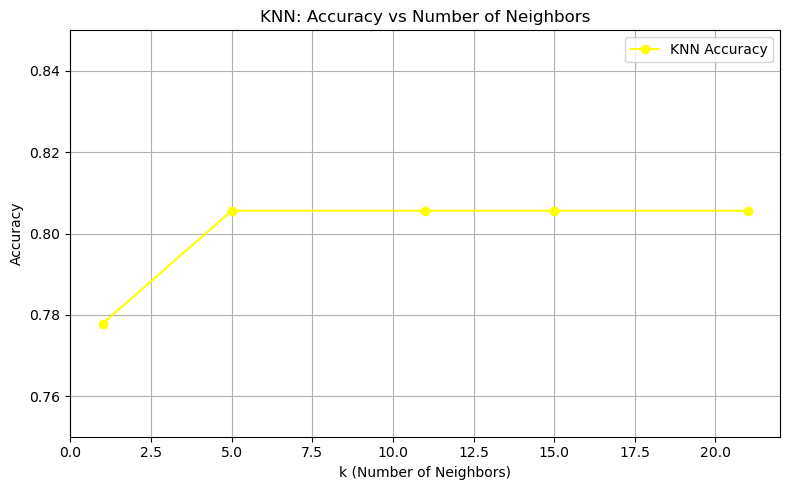

In [46]:
import matplotlib.pyplot as plt

# Accuracy data
k_values = [1, 5, 11, 15, 21]
knn_accuracy = [0.7778, 0.8056, 0.8056, 0.8056, 0.8056]

# Create plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_accuracy, marker='o', linestyle='-', color='yellow', label='KNN Accuracy')
plt.ylim(0.75, 0.85)

# Add axis labels and title
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy vs Number of Neighbors")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Plot: Accuracy vs RNN

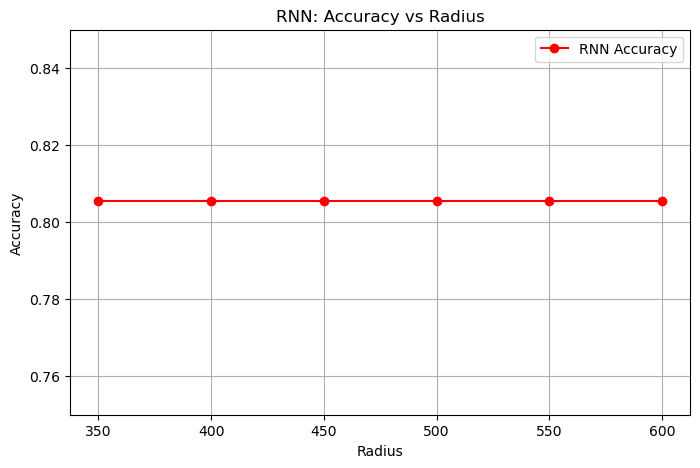

In [45]:
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracy = [0.8056] * 6  # Same value across all radius settings

# Create plot
plt.figure(figsize=(8, 5))
plt.plot(radius_values, rnn_accuracy, marker='o', color='red', label='RNN Accuracy')

# Create lables and title
plt.title("RNN: Accuracy vs Radius")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.85)
plt.grid(True)
plt.legend()
plt.show()

Key Observations:

 KNN Observations

    k = 1 slightly underperforms (accuracy = 0.7778); a classic sign of overfitting to noisy or fine-grained local structures.

    All other k values (5 through 21) give identical accuracy (0.8056); suggesting either:

        The dataset has relatively well-separated classes, or

        The distance metrics aren't sensitive enough to benefit from tighter or looser neighborhoods.

    Interpretation: The model is likely hitting a performance ceiling, perhaps due to feature scale issues, overlapping class distributions,
    or limited test set size.

 RNN Observations

    Accuracy is flat at 0.8056 for all radius values from 350 to 600.
    This likely indicates that:

        All test samples find neighbors within this radius range.

        The number or identity of neighbors doesn’t change meaningfully, meaning the radius is beyond any critical threshold.

    Interpretation: This is characteristic of overly large radius settings; the model behaves nearly like a global average classifier.
    The prediction is dominated by the class frequency in a broad neighborhood.

KNN vs RNN:

When to Use KNN

    If you want predictable, stable behavior across varying data densities.

    If you prefer tuning with a discrete hyperparameter (k); easier to grid search and interpret.

    If your data may contain sparse regions, and you want to avoid "unclassified" points.

    If you’re working with well-separated classes and don’t want over-smoothing.

    If you want a guaranteed prediction for every test sample (KNN always returns a label).

 When to Use RNN

    If your domain has a natural notion of distance or proximity (e.g., spatial/geographic data).

    If you want to restrict influence to a fixed local region, rather than a fixed number of neighbors.

    If you’re okay with some test points being left unclassified if no neighbors are nearby.

    If your dataset has uniform density, so a fixed radius gives consistent neighbor coverage.

    If you want to encode a "local voting zone" explicitly, which can be more interpretable in physical contexts.